# Rest API

In [1]:
# импортируем библиотеку, которая позволит отправлять запросы
import requests

In [8]:
# Для отправки запроса воспользуемся методом "get", передав в скобках адрес страницы "url"
url = "https://pythonru.com/biblioteki/kratkoe-rukovodstvo-po-biblioteke-python-requests"
response = requests.get(url)

# Ответ ,например, статус 200 OK означает, что ваш запрос был успешным, 
# а статус 404 NOT FOUND означает, что искомый ресурс не найден.
response


<Response [200]>

In [10]:

api_url = "https://python-scripts.com/requests"
response = requests.get(api_url)
print(response.url)


api_url = "https://python.ru/post/97/"
response = requests.get(api_url)
print(response.url)

url2 ='https://www.awesomeandrew.ru/2020/04/23/requests-python-%D0%B1%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0-%D0%B4%D0%BB%D1%8F-%D0%BE%D1%82%D0%BF%D1%80%D0%B0%D0%B2%D0%BA%D0%B8-http-%D0%B7%D0%B0%D0%BF%D1%80%D0%BE%D1%81%D0%BE%D0%B2/'
response = requests.get(url2)
print(response.url)


https://python-scripts.com/requests
https://python.ru/post/97/
https://www.awesomeandrew.ru/2020/04/23/requests-python-%D0%B1%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0-%D0%B4%D0%BB%D1%8F-%D0%BE%D1%82%D0%BF%D1%80%D0%B0%D0%B2%D0%BA%D0%B8-http-%D0%B7%D0%B0%D0%BF%D1%80%D0%BE%D1%81%D0%BE%D0%B2/


Использование .content обеспечивает доступ к любым данным в теле запроса. Однако, зачастую требуется конвертировать полученную информацию в строку в кодировке UTF-8. response делает это при помощи .text.

In [4]:
api_url = "https://pythonru.com/biblioteki/kratkoe-rukovodstvo-po-biblioteke-python-requests"
response = requests.get(api_url)

response.text



'<!doctype html >\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="ru-RU"> <!--<![endif]-->\n<head>\n  \t<meta charset="UTF-8" />\n    <title>Библиотека Python Requests: документация на русском, get и post</title><style id="rocket-critical-css">.td-all-devices .slides,.slides>li{margin:0!important;padding:0;list-style:none}:root{--wp-admin-theme-color:#007cba;--wp-admin-theme-color-darker-10:#006ba1;--wp-admin-theme-color-darker-20:#005a87}html{font-family:sans-serif;line-height:1.15;-ms-text-size-adjust:100%;-webkit-text-size-adjust:100%}body{margin:0}article,aside,header{display:block}h1{font-size:2em;margin:.67em 0}pre{font-family:monospace,monospace;font-size:1em}a{background-color:transparent;-webkit-text-decoration-skip:objects}img{border-style:none}svg:not(:root){overflow:hidden}button,input{font-family:sans-serif;font-size:100%;line-height:1.15;margin:0}button,input{over

Если в ответе содержимое является сериализированным JSON контентом, то можно сделать преобразование. Воспользовавшись словарем, можно взять полученные из .text строки str и провести с ними обратную сериализацию при помощи использования json.loads() (библиотека json). Есть и более простой способ, который требует применения .json().

In [11]:

api_url = "https://api.vk.com/method/users.get?user_ids=vladosbelov&fields=bdate&access_token=_______________&v=5.131"
response = requests.get(api_url)
# выведем ответ в виде текста
print('text:',response.text)
# выведем ответ в виде json
a=response.json()
a

text: {"response":[{"first_name":"Vladislav","id":10712197,"last_name":"Belov","can_access_closed":true,"is_closed":false,"bdate":"1.2"}]}


{'response': [{'first_name': 'Vladislav',
   'id': 10712197,
   'last_name': 'Belov',
   'can_access_closed': True,
   'is_closed': False,
   'bdate': '1.2'}]}

Тип полученного значения из .json(), является словарем. Это значит, что доступ к его содержимому можно получить по ключу.

Сохраним изображение с сервера

In [12]:
# передадим в запросе ссылку на изображение
image = requests.get('https://learn.python.ru/media/projects/sl1_Cj4bKxp.png')

# сохранение изображения
with open('new_image.png', 'wb') as f:
    f.write(image.content)

# Vk API + telegram API

Создадим уведомлялку в telegram, котораю будет оповещать нас о дне рождения кого-либо из списка друзей в Vk.

In [18]:
import pandas as pd

In [19]:
# длинный и некрасивый запрос
api_url = "https://api.vk.com/method/users.get?user_ids=esingildinov,vladosbelov&fields=bdate&access_token=_____________&v=5.131"
response = requests.get(api_url)
a=response.json()
a

{'response': [{'first_name': 'Evgeny',
   'id': 12393120,
   'last_name': 'Esingildinov',
   'can_access_closed': True,
   'is_closed': False,
   'bdate': '22.5.1995'},
  {'first_name': 'Vladislav',
   'id': 10712197,
   'last_name': 'Belov',
   'can_access_closed': True,
   'is_closed': False,
   'bdate': '1.2'}]}

In [3]:
# запрос с передачей параметров

vk_token3='__________________________'

name_my='vladosbelov'
name_friend='esingildinov'
id_friend='12393120'
id_my='10712197'

api_url = "https://api.vk.com/method/users.get?"
# передадим в params словарь со значением параметров
response = requests.get(api_url, params={'user_ids':name_my,\
                                         'fields':'bdate',\
                                         'access_token':vk_token3,\
                                         'v':'5.131'})
a=response.json()
a

{'response': [{'first_name': 'Vladislav',
   'id': 10712197,
   'last_name': 'Belov',
   'can_access_closed': True,
   'is_closed': False,
   'bdate': '1.2'}]}

In [21]:
# Выгрузим всех друзей из вк с их днями рождения

In [22]:
my_id='10712197'
vk_token='_______________________'

api_url = "https://api.vk.com/method/friends.get?"
response = requests.get(api_url, params={'user_id':my_id,\
                                         'order':'hints',\
                                         'fields':'bdate',\
                                         'access_token':vk_token3,\
                                         'v':'5.131'})
a=response.json()
a

{'response': {'count': 533,
  'items': [{'first_name': 'Boris',
    'id': 13811,
    'last_name': 'Veksler',
    'can_access_closed': True,
    'is_closed': False,
    'bdate': '23.2',
    'track_code': '039211949axWuDnm3IS_4U1sY-cBS12FZmkzYajqQq37xkd721mYxwmIWu7bhOjlS-SkO8IsPeMU'},
   {'first_name': 'Alexander',
    'id': 15972,
    'last_name': 'Danilin',
    'can_access_closed': True,
    'is_closed': False,
    'bdate': '2.6.1988',
    'track_code': 'b7593a2afUDLm8AnH6xyxKPSXpr0er3QNMFr-DH-dn8_GyoNme0QK5mu8nBM8H2UpFqZRjcd3bZG'},
   {'first_name': 'Natali',
    'id': 30817,
    'last_name': 'Nesmeyana',
    'can_access_closed': False,
    'is_closed': True,
    'bdate': '25.6',
    'track_code': 'b5cdb6d06RU8OmSjRYy3EuTTPkv-04NG_9LtlsAKHfBedcSrLeWEfmULA_YXgb5E4Fv5lz204yCN'},
   {'first_name': 'Inessa',
    'id': 43490,
    'last_name': 'Bashkova',
    'can_access_closed': True,
    'is_closed': False,
    'bdate': '15.6.1986',
    'track_code': '24be1d521kBZhoxGp_WbF8rR6C5dlzyQuexPn

In [23]:
# Заполним DataFrame имя-дата рождения-день-месяц

df=pd.DataFrame(columns=['id','name','date','day','month'])
for i in range(len(a['response']['items'])):
    try:
        df.loc[i]=[i+1,\
               a['response']['items'][i]['first_name']+' '+a['response']['items'][i]['last_name'],
               a['response']['items'][i]['bdate'],\
               int((a['response']['items'][i]['bdate']).split('.')[0]),\
               int((a['response']['items'][i]['bdate']).split('.')[1])]
    except:
        df.loc[i]=[i+1,\
               a['response']['items'][i]['first_name']+' '+a['response']['items'][i]['last_name'],
              'null',\
              'null',\
              'null']

        
df

,id,name,date,day,month
0,1,Boris Veksler,23.2,23,2
1,2,Alexander Danilin,2.6.1988,2,6
2,3,Natali Nesmeyana,25.6,25,6
3,4,Inessa Bashkova,15.6.1986,15,6
4,5,Yury Rudchik,17.10.1987,17,10
...,...,...,...,...,...
528,529,Irina Golubeva,1.6.2006,1,6
529,530,Vlad Vlados,3.2.1999,3,2
530,531,Watermelon Sugar,17.4.1996,17,4
531,532,Milana Kreyn,null,null,null


In [24]:
# получим сегодняшнюю дату с помощью библиотеки datetime
import datetime

now = datetime.datetime.now()
print(str(now))

month=int(str(now)[5:7])
day=int(str(now)[8:10])

print(day,month)

2021-09-28 18:50:13.911850
28 9


In [25]:
# Проверка на день рождение + заполнения списка имен

name_of_bday=[]
for i in range(len(a['response']['items'])):
    if df.loc[i]['day']==day:
        if df.loc[i]['month']==month:
            name_of_bday.append(df.iloc[i][1])

print('Найдены:', str(name_of_bday)[1:-1])

Найдены: 'Tatyana Salutskaya'


# Создадим бота в @BotFather, получим токен, создадим канал и добавим бота в админы

In [106]:
#найдем botfather и получим токен, который нам пришлют

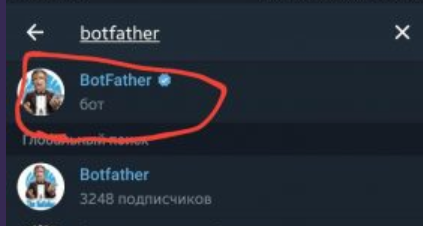

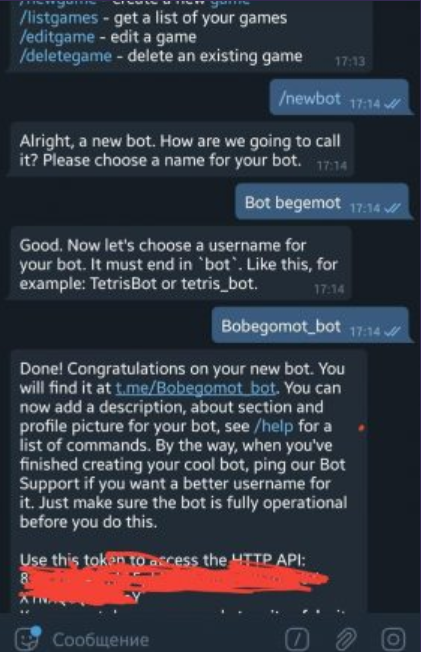

In [9]:
# теперь требуется получить айди чата(chat_id), в котором будет общаться бот

# для этого нужно что-нибудь написать в чате, а далее выполнить запрос с методом getUpdates

api_token='______________________________'
chat_id='-1001554359417'

api_url = 'https://api.telegram.org/bot'+api_token+'/getUpdates'
response = requests.get(api_url)
a=response.json()
a

# чат айди хранится в 'sender_chat': {'id': -1001554359417,...

{'ok': True,
 'result': [{'update_id': 338303648,
   'channel_post': {'message_id': 58,
    'sender_chat': {'id': -1001554359417,
     'title': 'Bday',
     'username': 'dbay_waskov',
     'type': 'channel'},
    'chat': {'id': -1001554359417,
     'title': 'Bday',
     'username': 'dbay_waskov',
     'type': 'channel'},
    'date': 1635079564,
    'text': 'А'}}]}

In [40]:
api_url = 'https://api.telegram.org/bot'+api_token+'/getUpdates'
response = requests.get(api_url)
a=response.json()
a

{'ok': True,
 'result': [{'update_id': 338303361,
   'channel_post': {'message_id': 53,
    'sender_chat': {'id': -1001554359417,
     'title': 'Bday',
     'username': 'dbay_waskov',
     'type': 'channel'},
    'chat': {'id': -1001554359417,
     'title': 'Bday',
     'username': 'dbay_waskov',
     'type': 'channel'},
    'date': 1633375810,
    'text': 'По'}},
  {'update_id': 338303362,
   'channel_post': {'message_id': 54,
    'sender_chat': {'id': -1001554359417,
     'title': 'Bday',
     'username': 'dbay_waskov',
     'type': 'channel'},
    'chat': {'id': -1001554359417,
     'title': 'Bday',
     'username': 'dbay_waskov',
     'type': 'channel'},
    'date': 1633375844,
    'text': '/start',
    'entities': [{'offset': 0, 'length': 6, 'type': 'bot_command'}]}},
  {'update_id': 338303363,
   'message': {'message_id': 1,
    'from': {'id': 379473796,
     'is_bot': False,
     'first_name': 'Vladislav',
     'last_name': '-',
     'username': 'waskov',
     'language_code': '

In [109]:
# Проверка на наличие именниников и отправка сообщения

name=str(name_of_bday)[1:-1]

if len(name)==0:
    api_url = "https://api.telegram.org/bot"+api_token+"/sendMessage?"
    text_in_message='Сегодня из друзей никто не родился'
    requests.get(api_url, params={'chat_id':chat_id,\
                                 'text':text_in_message})
    print('send_no')
else:
    api_url = "https://api.telegram.org/bot"+api_token+"/sendMessage?"
    text_in_message='Сегодня день рождения у:'+str(name_of_bday)[1:-1]
    requests.get(api_url, params={'chat_id':chat_id,\
                                 'text':text_in_message})
    print('send_yes')
    import random
    api_url = "https://api.vk.com/method/messages.send?user_id="+id_my+"&message=постравь с ДР "+str('@lebedka')+"&random_id="+str(random.randint(1,100))+"&v=5.131&access_token="+vk_token_group
    requests.get(api_url)

send_yes


# Отправим текст поздравления и фото, которые можно будет переслать

In [6]:
# На сайте поздравлений спарсим поздравление
api_url = "https://t-loves.narod.ru/s-dnem-rozhdeniya-svoimi-slovami.htm"
test_of_bd_message=requests.get(api_url, verify=False).text.\
                                split('\n</p>\n<span>\n</span>\n <p>\n')[8].\
                                replace('\n','')[3:]


# Отправим скаченное поздравление
api_url = "https://api.telegram.org/bot"+api_token+"/sendMessage?"
requests.get(api_url, params={'chat_id':chat_id,\
                                 'text':test_of_bd_message})

C:\Users\belovvs\Anaconda3\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 't-loves.narod.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>

In [39]:
# скачаем и отправим картинку с поздравление

image = requests.get('https://t-loves.narod.ru/images/sdr00008888.jpg')
with open('new_image.png', 'wb') as f:
    f.write(image.content)
    
# Отправим фото, которые можно будет переслать
file='new_image.png'
files1 = {'photo': open(file, 'rb')}
dat = {'chat_id' : chat_id}
api_url = "https://api.telegram.org/bot"+api_token+"/sendPhoto"
requests.post(api_url, files=files1,data=dat)

<Response [200]>

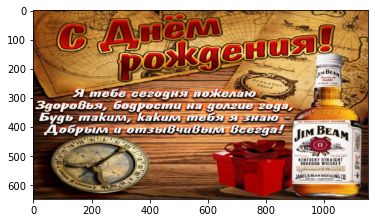

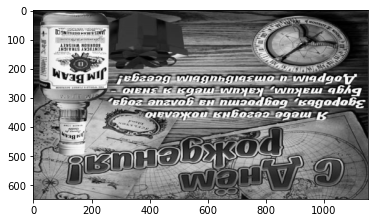

In [242]:
# Отредактируем и сохраним картинку
from matplotlib import image
from matplotlib import pyplot as plt

img = image.imread("new2.png")
plt.imshow(img)

plt.show()
img1=img.copy()

for i in range(img.shape[1]):
    for y in range(img.shape[0]):
        for x in range(img.shape[2]):
            
            img1[y][i][x]=img[img.shape[0]-y-1][img.shape[1]-i-1][x]
        C = 0.2989 * img[img.shape[0]-y-1][img.shape[1]-i-1][0] + 0.5870 * img[img.shape[0]-y-1][img.shape[1]-i-1][1] + 0.1140 * img[img.shape[0]-y-1][img.shape[1]-i-1][2]
        img1[y][i]=C
plt.imshow(img1)   
plt.show()


# save the image
plt.imsave('test.png', img1)

# Сообщения от имени сообщества

Создадим соощество и начнем отправлять сообщения от имени собщества подписчикам

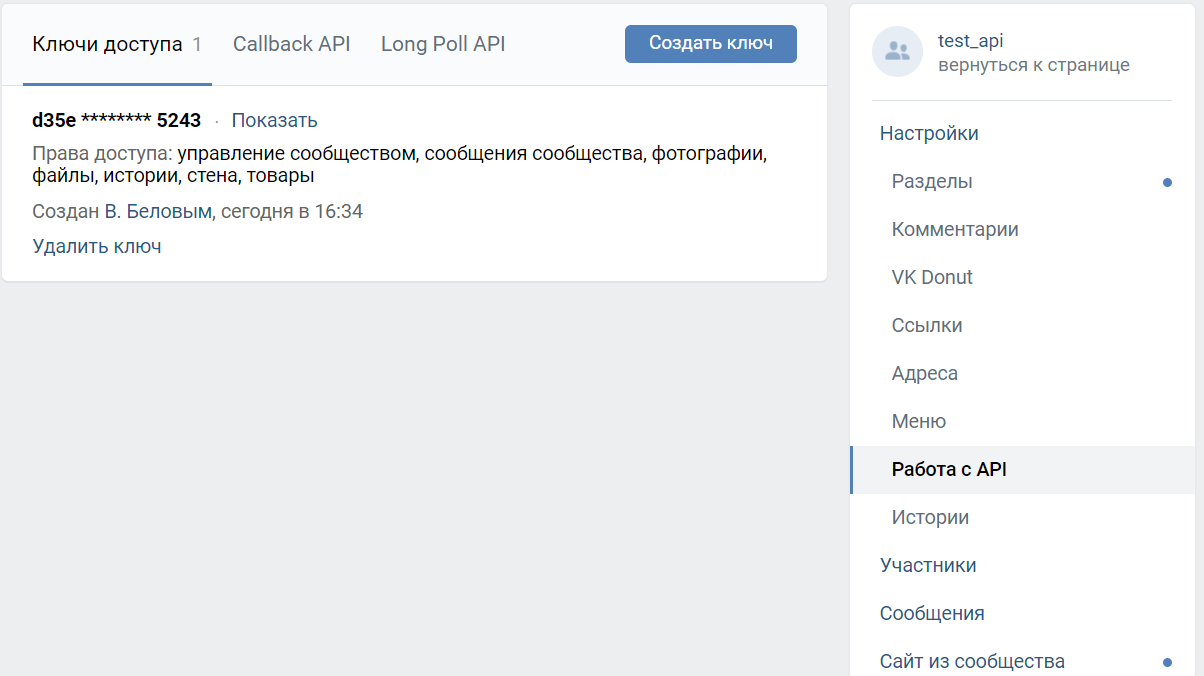


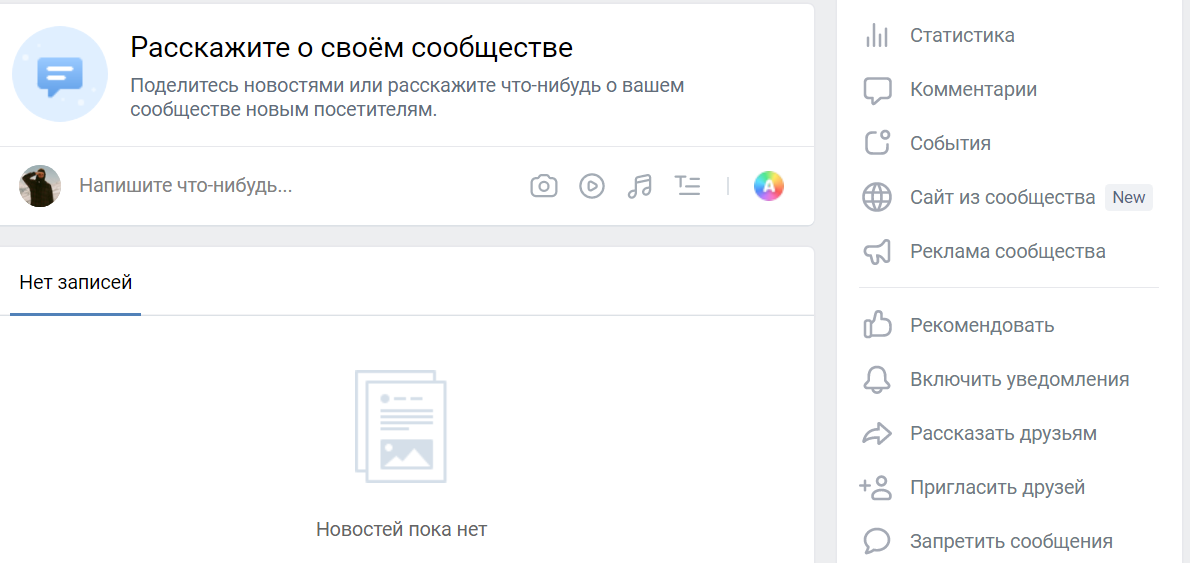

In [30]:
vk_token_group='____________________________'

In [146]:
import random
api_url = "https://t-loves.narod.ru/s-dnem-rozhdeniya-svoimi-slovami.htm"
test_of_bd_message=requests.get(api_url, verify=False).text.\
                                split('\n</p>\n<span>\n</span>\n <p>\n')[8].\
                                replace('\n','')[3:]


# Отправим от имени сообщества сообщение с поздравлением
api_url = "https://api.vk.com/method/messages.send?"
requests.get(api_url, params={'user_id':id_my,\
                             'message':test_of_bd_message,\
                             'random_id':str(random.randint(1,100)),\
                             'v':'5.131',\
                             'access_token':vk_token_group})

C:\Users\belovvs\Anaconda3\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 't-loves.narod.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>

In [31]:
# Посмотрим историю переписки, в параметре count укажем количество сообщений
api_url ="https://api.vk.com/method/messages.getHistory?"
requests.get(api_url, params={'user_id':id_my,\
                             'count':1,\
                             'v':'5.131',\
                             'access_token':vk_token_group}).json()

{'response': {'count': 13,
  'items': [{'date': 1632668410,
    'from_id': -207460103,
    'id': 14,
    'out': 1,
    'peer_id': 10712197,
    'text': 'Я поздравляю тебя от всей души!Желаю крепкого здоровья, неразлучной с ним красоты, счастья в личной жизни ифинансового благополучия. Хочу, чтобы тебя всегда преследовала удача, мечтысбывались, а твой жизненный путь был усеян цветами. Иди по нему, гордо поднявголову, одаряя близких обаянием и добротой и получая любовь в ответ. С праздником,дорогая!',
    'conversation_message_id': 13,
    'fwd_messages': [],
    'important': False,
    'random_id': 46,
    'attachments': [],
    'is_hidden': False}]}}

# прокси

In [234]:
http_proxy = "http://172.67.182.100:80"
proxyDict = {"http" :http_proxy}


api_url="https://api.vk.com/method/messages.getHistory?"
requests.get(api_url, proxies=proxyDict, params={'user_id':id_my,\
                             'count':1,\
                             'v':'5.131',\
                             'access_token':vk_token_group}).json()

{'response': {'count': 13,
  'items': [{'date': 1632668410,
    'from_id': -207460103,
    'id': 14,
    'out': 1,
    'peer_id': 10712197,
    'text': 'Я поздравляю тебя от всей души!Желаю крепкого здоровья, неразлучной с ним красоты, счастья в личной жизни ифинансового благополучия. Хочу, чтобы тебя всегда преследовала удача, мечтысбывались, а твой жизненный путь был усеян цветами. Иди по нему, гордо поднявголову, одаряя близких обаянием и добротой и получая любовь в ответ. С праздником,дорогая!',
    'conversation_message_id': 13,
    'fwd_messages': [],
    'important': False,
    'random_id': 46,
    'attachments': [],
    'is_hidden': False}]}}